In [1]:
#import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import scipy.stats
import numpy as np
from math import sqrt
import statsmodels.formula.api as smf

In [2]:
#set up the metric calculations
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [3]:
#read in the cdatasub
cdatasub = pd.read_csv("london_flows.csv")

In [4]:
cdatasub.head(10)

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
5,Abbey Road,Crossharbour,1,599,1208,6686.475560
6,Abbey Road,Custom House,0,599,845,3824.855630
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909
8,Abbey Road,Cyprus,7,599,850,6532.099618
9,Abbey Road,Devons Road,1,599,611,3958.324171


In [5]:
cdatasub

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554


In [6]:
#show the actual flows between boroughs
cdatasubmat = pd.pivot_table(cdatasub, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
#show the data
cdatasubmat

C:\Users\W\AppData\Local\Temp\ipykernel_25700\2414277126.py:2: FutureWarning: The provided callable <function sum at 0x0000027BFFF24F40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cdatasubmat = pd.pivot_table(cdatasub, values ="flows", index="station_origin", columns = "station_destination",
C:\Users\W\AppData\Local\Temp\ipykernel_25700\2414277126.py:2: FutureWarning: The provided callable <function sum at 0x0000027BFFF24F40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cdatasubmat = pd.pivot_table(cdatasub, values ="flows", index="station_origin", columns = "station_destination",
C:\Users\W\AppData\Local\Temp\ipykernel_25700\2414277126.py:2: FutureWarning: The provided callable <function sum at 0x0000027BFFF24F40> is currently 

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [7]:
cdatasub = cdatasub.dropna()

In [8]:
cdatasub = cdatasub[cdatasub['distance'] != 0].reset_index(drop=True)

### III.2. Doubly Constrained Model

In [56]:
#take the variables and produce logarithms of them
x_variables= ["distance"]
log_x_vars = []
for x in x_variables:
    cdatasub[f"log_{x}"] = np.log(cdatasub[x])
    log_x_vars.append(f"log_{x}")

KeyError: 'distance, jobs'

In [10]:
#create the formula (the "-1" indicates no intercept in the regression model).
dbl_form = 'flows ~ station_destination + station_origin + log_distance-1'
#run a doubly constrained sim
doubSim = smf.glm(formula = dbl_form, data=cdatasub, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(doubSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    60658
Model Family:                 Poisson   Df Model:                          797
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.7074e+05
Date:                Fri, 05 Apr 2024   Deviance:                   1.7693e+06
Time:                        22:03:25   Pearson chi2:                 2.47e+06
No. Iterations:                    27   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [11]:
#get the estimates
cdatasub["doubsimfitted"] = np.round(doubSim.mu)
#here's the matrix
cdatasubmat7 = cdatasub.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatasubmat7

C:\Users\W\AppData\Local\Temp\ipykernel_25700\1764218673.py:4: FutureWarning: The provided callable <function sum at 0x0000027BFFF24F40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cdatasubmat7 = cdatasub.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
C:\Users\W\AppData\Local\Temp\ipykernel_25700\1764218673.py:4: FutureWarning: The provided callable <function sum at 0x0000027BFFF24F40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cdatasubmat7 = cdatasub.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
C:\Users\W\AppData\Local\Temp\ipykernel_25700\1764218673.py:4: FutureWarning: The provided callable <function sum at 0x0000027BFFF24F40> is 

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,15.0,15.0,NaN,11.0,1.0,NaN,17.0,...,30.0,3.0,5.0,12.0,NaN,2.0,NaN,2.0,NaN,3747.0
Aldgate,NaN,NaN,2.0,NaN,42.0,NaN,NaN,0.0,NaN,19.0,...,7.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2873.0
Aldgate East,NaN,NaN,2.0,49.0,NaN,NaN,1.0,0.0,NaN,21.0,...,8.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,31.0,33.0,NaN,NaN,NaN,NaN,29.0,...,29.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange Park,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,5.0,18.0,17.0,NaN,3.0,NaN,NaN,22.0,...,21.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [12]:
CalcRSqaured(cdatasub["flows"],cdatasub["doubsimfitted"])

0.4077003472410465

In [13]:
CalcRMSE(cdatasub["flows"],cdatasub["doubsimfitted"])

101.3

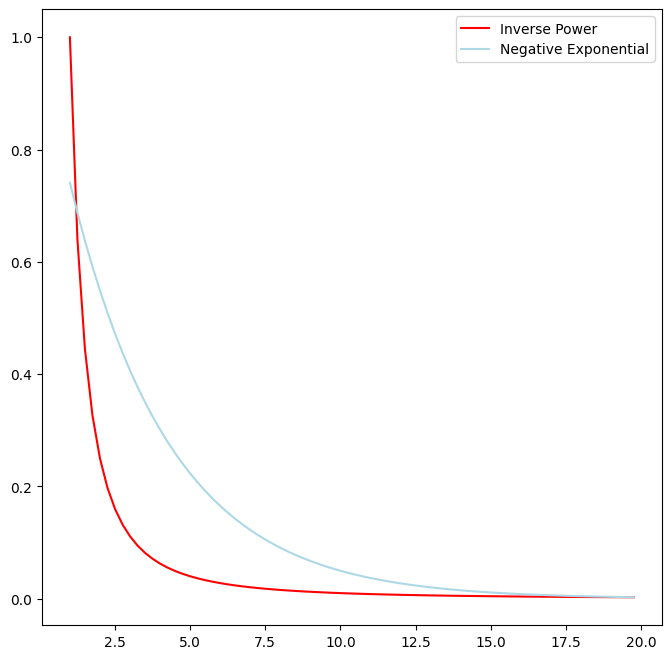

In [14]:
# Now let's consider some model tweaks.
# Starting with distance decay.
# Let's graph the distance decay parameters to get a feel for how they work.
xs = np.arange(1.0,20.0,0.25)
# inverse square power
y_inv_power = np.power(xs,-2)
# negative exponential, beta = 0.3
y_neg_exp_point3 = np.exp(-0.3*xs)

# Now a plot.
f, ax = plt.subplots(figsize=(8,8))
ax.plot(xs,y_inv_power, label = "Inverse Power", color = "red")
ax.plot(xs,y_neg_exp_point3, label = 'Negative Exponential', color = "lightblue")
ax.legend();

### negative exponential cost function

In [15]:
# Run a doubly constrained SIM with a negative exponential cost function.
doubsim_form = "flows ~ station_origin + station_destination + distance -1"
doubsim1 = smf.glm(formula=doubsim_form, data = cdatasub, family = sm.families.Poisson()).fit()
print(doubsim1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    60658
Model Family:                 Poisson   Df Model:                          797
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.5105e+05
Date:                Fri, 05 Apr 2024   Deviance:                   1.5299e+06
Time:                        22:04:41   Pearson chi2:                 2.02e+06
No. Iterations:                    27   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [16]:
cdatasub["doubsimfitted1"] = np.round(doubsim1.mu,0)

In [17]:
CalcRSqaured(cdatasub["flows"],cdatasub["doubsimfitted1"])

0.49785541411176426

In [18]:
CalcRMSE(cdatasub["flows"],cdatasub["doubsimfitted1"])

93.368

##### Iteration

In [19]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(cdatasub.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
cdatasub = cdatasub.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(cdatasub.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
cdatasub = cdatasub.merge(D_j, on = "station_destination", how = "left" )

C:\Users\W\AppData\Local\Temp\ipykernel_25700\479265784.py:3: FutureWarning: The provided callable <function sum at 0x0000027BFFF24F40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  O_i = pd.DataFrame(cdatasub.groupby(["station_origin"])["flows"].agg(np.sum))
C:\Users\W\AppData\Local\Temp\ipykernel_25700\479265784.py:7: FutureWarning: The provided callable <function sum at 0x0000027BFFF24F40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  D_j = pd.DataFrame(cdatasub.groupby(["station_destination"])["flows"].agg(np.sum))


In [20]:
cdatasub

,station_origin,station_destination,flows,population,jobs,distance,log_distance,doubsimfitted,doubsimfitted1,O_i,D_j
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,9.003504,55.0,77.0,599,78549
1,Abbey Road,Beckton,1,599,442,8510.121774,9.049012,2.0,3.0,599,442
2,Abbey Road,Blackwall,3,599,665,3775.448872,8.236275,3.0,4.0,599,665
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,8.534348,77.0,112.0,599,58772
4,Abbey Road,Canning Town,37,599,15428,2228.923167,7.709274,45.0,48.0,599,15428
...,...,...,...,...,...,...,...,...,...,...,...
61451,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,9.503144,257.0,185.0,7892,3342
61452,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,9.071245,152.0,176.0,7892,5487
61453,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,9.162905,20.0,27.0,7892,400
61454,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.585832,115.0,132.0,7892,893


In [21]:
# Use the beta we got from the inverse power model
beta = -doubSim.params[-1]
beta

C:\Users\W\AppData\Local\Temp\ipykernel_25700\1031889816.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = -doubSim.params[-1]


0.909631760493278

In [22]:
# Use the beta we got from the negative exponential model
beta = -doubsim1.params[-1]
beta

C:\Users\W\AppData\Local\Temp\ipykernel_25700\887293667.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = -doubsim1.params[-1]


0.00015436969215589945

In [23]:

# Here is the entropy maximising approach for a known beta.
# Plug in the required values in this function to solve.

def balance_doubly_constrained(pd, orig_field, dest_field, Oi_field, Dj_field, cij_field, beta, 
                               cost_function, Ai_name = "Ai_new", Bj_name = "Bj_new", converge=0.001):
    # Define some variables
    Oi = pd[[orig_field, Oi_field]]
    Dj = pd[[dest_field,Dj_field]]    
    if cost_function.lower() in ['power','pow']:
        beta_cij = np.exp(beta * np.log(pd[cij_field]))
    elif cost_function.lower() in ['exponential','exp']:
        beta_cij = np.exp(beta * pd[cij_field])
    else:
        return "Cost function not specified properly, use 'exp' or 'pow'"
    
    # Create some helper variables
    cnvg = 1
    iteration = 0
    # Now iteratively rebalance the Ai and Bj terms until convergence
    while cnvg > converge:
        if iteration == 0:
            # This first condition sets starting values for Ai and Bj
            # NB sets starting value of Ai assuming Bj is a vector of 1s.
            # We've already established beta_cij with the appropriate cost function, so...
            Oi = Oi.assign(Ai = Dj[Dj_field] * beta_cij)
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Now set up Bjs using starting values of Ai
            Dj = Dj.assign(Bj = Oi['Ai_old'] * Oi[Oi_field] * beta_cij)
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Increment loop
            iteration += 1
        else:
            # This bit is the iterated bit of the loop which refines the values of Ai and Bj
            # First Ai
            Oi['Ai'] = Dj['Bj_old'] * Dj[Dj_field] * beta_cij
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Drop temporary Ai
            Oi.drop('Ai', axis=1, inplace=True)
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True)
            # Calculate the difference between old and new Ais
            Oi['diff'] = np.absolute((Oi['Ai_old'] - Oi['Ai'])/Oi['Ai_old'])
            # Set new Ais to Ai_old
            Oi['Ai_old'] = Oi['Ai']
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Then Bj
            Dj['Bj'] = Oi['Ai_old'] * Oi[Oi_field] * beta_cij
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Drop temporary Bj
            Dj.drop('Bj', axis=1, inplace=True)
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True)
            # Calculate the difference between old and new Bjs
            Dj['diff'] = np.absolute((Dj['Bj_old'] - Dj['Bj'])/Dj['Bj_old'])
            # Set new Bjs to Bj_old
            Dj['Bj_old'] = Dj['Bj']
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Assign higher sum difference from Ai or Bj to cnvg
            cnvg = np.maximum(Oi['diff'].sum(),Dj['diff'].sum())
            
            # Print and increment loop
            print("Iteration:", iteration)
            iteration += 1

    # When the while loop finishes add the computed Ai_old and Bj_old to the dataframe and return
    pd[Ai_name] = Oi['Ai_old']
    pd[Bj_name] = Dj['Bj_old']
    return pd

In [24]:

# Use the beta we got from the inverse power model
beta = -doubSim.params[-1]
# Get the balancing factors.
cdatasub = balance_doubly_constrained(cdatasub,'station_origin','station_destination','O_i','D_j','distance',-beta,'power')

# Now predict the model again using the new Ai and Dj fields.
cdatasub['SIM_est_pow'] = np.round(cdatasub['O_i'] * cdatasub['Ai_new'] * cdatasub['D_j'] * cdatasub['Bj_new'] * 
                                   np.exp(np.log(cdatasub['distance'])*-beta))
# Check out the matrix
pd.pivot_table(cdatasub,values='SIM_est_pow',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

C:\Users\W\AppData\Local\Temp\ipykernel_25700\2455301955.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = -doubSim.params[-1]


Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22


C:\Users\W\AppData\Local\Temp\ipykernel_25700\2455301955.py:10: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(cdatasub,values='SIM_est_pow',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)
C:\Users\W\AppData\Local\Temp\ipykernel_25700\2455301955.py:10: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(cdatasub,values='SIM_est_pow',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)
C:\Users\W\AppData\Local\Temp\ipykernel_25700\2455301955.py:10: FutureWarning: The provided callable <built-in function sum>

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,600.0
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1224.0
Acton Town,0.0,0.0,0.0,15.0,15.0,0.0,11.0,1.0,0.0,17.0,...,30.0,3.0,5.0,12.0,0.0,2.0,0.0,2.0,0.0,3747.0
Aldgate,0.0,0.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,19.0,...,7.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,2873.0
Aldgate East,0.0,0.0,2.0,49.0,0.0,0.0,1.0,0.0,0.0,21.0,...,8.0,1.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,7.0,31.0,33.0,0.0,0.0,0.0,0.0,29.0,...,29.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,4862.0
Woodgrange Park,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,530.0
Woodside Park,0.0,0.0,5.0,18.0,17.0,0.0,3.0,0.0,0.0,22.0,...,21.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3093.0


In [25]:
# Use the beta we got from the negative exponential model
beta = -doubsim1.params[-1]
# Get the balancing factors. NB Setting of new field names for Ai and Bj.
cdatasub = balance_doubly_constrained(cdatasub,'station_origin','station_destination','O_i','D_j','distance',-beta,'exponential','Ai_exp','Bj_exp')

# Now predict the model again using the new Ai and Dj fields.
cdatasub['SIM_est_exp'] = np.round(cdatasub['O_i'] * cdatasub['Ai_exp'] * cdatasub['D_j'] * cdatasub['Bj_exp'] * 
                                   np.exp(cdatasub['distance']*-beta))
# Check out the matrix
pd.pivot_table(cdatasub,values='SIM_est_exp',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

C:\Users\W\AppData\Local\Temp\ipykernel_25700\3828628781.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = -doubsim1.params[-1]


Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23


C:\Users\W\AppData\Local\Temp\ipykernel_25700\3828628781.py:10: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(cdatasub,values='SIM_est_exp',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)
C:\Users\W\AppData\Local\Temp\ipykernel_25700\3828628781.py:10: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(cdatasub,values='SIM_est_exp',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)
C:\Users\W\AppData\Local\Temp\ipykernel_25700\3828628781.py:10: FutureWarning: The provided callable <built-in function sum>

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,603.0
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1221.0
Acton Town,0.0,0.0,0.0,11.0,10.0,0.0,17.0,0.0,0.0,12.0,...,40.0,4.0,2.0,19.0,0.0,0.0,0.0,1.0,0.0,3752.0
Aldgate,0.0,0.0,1.0,0.0,32.0,0.0,0.0,0.0,0.0,23.0,...,7.0,0.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,2883.0
Aldgate East,0.0,0.0,2.0,38.0,0.0,0.0,0.0,0.0,0.0,24.0,...,7.0,1.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,2.0,38.0,44.0,0.0,0.0,0.0,0.0,25.0,...,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,4862.0
Woodgrange Park,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,528.0
Woodside Park,0.0,0.0,2.0,17.0,15.0,0.0,0.0,0.0,0.0,25.0,...,10.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3093.0


In [26]:
pivot_table = pd.pivot_table(cdatasub, values='SIM_est_exp', index='station_origin', columns='station_destination', fill_value=0, aggfunc=sum, margins=True)

pivot_table.to_csv('pivot_table.csv')

C:\Users\W\AppData\Local\Temp\ipykernel_25700\2958992495.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = pd.pivot_table(cdatasub, values='SIM_est_exp', index='station_origin', columns='station_destination', fill_value=0, aggfunc=sum, margins=True)
C:\Users\W\AppData\Local\Temp\ipykernel_25700\2958992495.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = pd.pivot_table(cdatasub, values='SIM_est_exp', index='station_origin', columns='station_destination', fill_value=0, aggfunc=sum, margins=True)
C:\Users\W\AppData\Local\Temp\ipykernel_25700\2958992495.py:1: FutureWarning: The provid

In [27]:
cdatasub

,station_origin,station_destination,flows,population,jobs,distance,log_distance,doubsimfitted,doubsimfitted1,O_i,D_j,Ai_new,Bj_new,SIM_est_pow,Ai_exp,Bj_exp,SIM_est_exp
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,9.003504,55.0,77.0,599,78549,0.005822,0.721588,55.0,0.000008,0.743537,77.0
1,Abbey Road,Beckton,1,599,442,8510.121774,9.049012,2.0,3.0,599,442,0.005822,5.025228,2.0,0.000008,4.880997,3.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,8.236275,3.0,4.0,599,665,0.005822,2.086636,3.0,0.000008,2.138565,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,8.534348,77.0,112.0,599,58772,0.005822,0.878173,77.0,0.000008,0.904224,112.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,7.709274,45.0,48.0,599,15428,0.005822,0.937083,45.0,0.000008,0.946081,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61451,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,9.503144,257.0,185.0,7892,3342,0.015367,3.595736,257.0,0.000017,3.211829,185.0
61452,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,9.071245,152.0,176.0,7892,5487,0.015367,0.878169,152.0,0.000017,0.899193,176.0
61453,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,9.162905,20.0,27.0,7892,400,0.015367,1.678166,20.0,0.000017,2.118110,27.0
61454,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.585832,115.0,132.0,7892,893,0.015367,2.624221,115.0,0.000017,2.467993,132.0


In [28]:
# Use the beta we got from the negative exponential model
beta = -doubsim1.params[-1]
# Get the balancing factors. NB Setting of new field names for Ai and Bj.
cdatasub = balance_doubly_constrained(cdatasub,'station_origin','station_destination','O_i','D_j','distance',-beta,'exponential','Ai_exp','Bj_exp')

# Now predict the model again using the new Ai and Dj fields.
cdatasub['SIM_est_exp'] = np.round(cdatasub['O_i'] * cdatasub['Ai_exp'] * cdatasub['D_j'] * cdatasub['Bj_exp'] * 
                                   np.exp(cdatasub['distance']*-beta))
# Check out the matrix
pd.pivot_table(cdatasub,values='SIM_est_exp',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

C:\Users\W\AppData\Local\Temp\ipykernel_25700\3828628781.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = -doubsim1.params[-1]


Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23


C:\Users\W\AppData\Local\Temp\ipykernel_25700\3828628781.py:10: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(cdatasub,values='SIM_est_exp',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)
C:\Users\W\AppData\Local\Temp\ipykernel_25700\3828628781.py:10: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(cdatasub,values='SIM_est_exp',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)
C:\Users\W\AppData\Local\Temp\ipykernel_25700\3828628781.py:10: FutureWarning: The provided callable <built-in function sum>

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,603.0
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1221.0
Acton Town,0.0,0.0,0.0,11.0,10.0,0.0,17.0,0.0,0.0,12.0,...,40.0,4.0,2.0,19.0,0.0,0.0,0.0,1.0,0.0,3752.0
Aldgate,0.0,0.0,1.0,0.0,32.0,0.0,0.0,0.0,0.0,23.0,...,7.0,0.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,2883.0
Aldgate East,0.0,0.0,2.0,38.0,0.0,0.0,0.0,0.0,0.0,24.0,...,7.0,1.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,2.0,38.0,44.0,0.0,0.0,0.0,0.0,25.0,...,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,4862.0
Woodgrange Park,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,528.0
Woodside Park,0.0,0.0,2.0,17.0,15.0,0.0,0.0,0.0,0.0,25.0,...,10.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3093.0


In [29]:
pivot_table = pd.pivot_table(cdatasub, values='SIM_est_exp', index='station_origin', columns='station_destination', fill_value=0, aggfunc=sum, margins=True)

pivot_table.to_csv('pivot_table.csv')

C:\Users\W\AppData\Local\Temp\ipykernel_25700\2958992495.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = pd.pivot_table(cdatasub, values='SIM_est_exp', index='station_origin', columns='station_destination', fill_value=0, aggfunc=sum, margins=True)
C:\Users\W\AppData\Local\Temp\ipykernel_25700\2958992495.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = pd.pivot_table(cdatasub, values='SIM_est_exp', index='station_origin', columns='station_destination', fill_value=0, aggfunc=sum, margins=True)
C:\Users\W\AppData\Local\Temp\ipykernel_25700\2958992495.py:1: FutureWarning: The provid

In [30]:
cdatasub

,station_origin,station_destination,flows,population,jobs,distance,log_distance,doubsimfitted,doubsimfitted1,O_i,D_j,Ai_new,Bj_new,SIM_est_pow,Ai_exp,Bj_exp,SIM_est_exp
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,9.003504,55.0,77.0,599,78549,0.005822,0.721588,55.0,0.000008,0.743537,77.0
1,Abbey Road,Beckton,1,599,442,8510.121774,9.049012,2.0,3.0,599,442,0.005822,5.025228,2.0,0.000008,4.880997,3.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,8.236275,3.0,4.0,599,665,0.005822,2.086636,3.0,0.000008,2.138565,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,8.534348,77.0,112.0,599,58772,0.005822,0.878173,77.0,0.000008,0.904224,112.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,7.709274,45.0,48.0,599,15428,0.005822,0.937083,45.0,0.000008,0.946081,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61451,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,9.503144,257.0,185.0,7892,3342,0.015367,3.595736,257.0,0.000017,3.211829,185.0
61452,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,9.071245,152.0,176.0,7892,5487,0.015367,0.878169,152.0,0.000017,0.899193,176.0
61453,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,9.162905,20.0,27.0,7892,400,0.015367,1.678166,20.0,0.000017,2.118110,27.0
61454,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.585832,115.0,132.0,7892,893,0.015367,2.624221,115.0,0.000017,2.467993,132.0


In [31]:
beta = -doubsim1.params[-1]

C:\Users\W\AppData\Local\Temp\ipykernel_25700\2912706398.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = -doubsim1.params[-1]


In [32]:
beta

0.00015436969215589945

In [33]:
df_max = cdatasub[['station_origin', 'station_destination', 'flows']].sort_values(by='flows', ascending=False).head(20)
df_min = cdatasub[['station_origin', 'station_destination', 'flows']].sort_values(by='flows', ascending=True).head(10)

print(df_max)
print(df_min)

df_max.to_csv('top_10_sim_exp_max.csv', index=False)
df_min.to_csv('top_10_sim_exp_min.csv', index=False)

          station_origin       station_destination  flows
55932           Waterloo         Bank and Monument  15946
55957           Waterloo              Canary Wharf   8085
50079          Stratford          Liverpool Street   6946
32642      London Bridge              Canary Wharf   6165
54809           Victoria             Oxford Circus   5181
8541        Canada Water              Canary Wharf   4030
49932          Stratford              Canary Wharf   3875
32392   Liverpool Street                Farringdon   3755
18958      Finsbury Park      Highbury & Islington   3659
8661        Canada Water             London Bridge   3202
27854             Ilford                 Stratford   3080
8817        Canary Wharf         Bank and Monument   2643
54881           Victoria             Warren Street   2599
56088           Waterloo             Oxford Circus   2425
6946             Brixton             Oxford Circus   2411
18978      Finsbury Park  King's Cross St. Pancras   2403
2596   Bank an

In [34]:
df_max1 = cdatasub[['station_origin', 'station_destination', 'SIM_est_exp', 'flows','Ai_exp','Bj_exp']].sort_values(by='SIM_est_exp', ascending=False).head(20)
df_min1 = cdatasub[['station_origin', 'station_destination', 'SIM_est_exp', 'flows','Ai_exp','Bj_exp']].sort_values(by='SIM_est_exp', ascending=True).head(10)

print(df_max1)
print(df_min1)

df_max1.to_csv('top_10_sim_exp_max1.csv', index=False)
df_min1.to_csv('top_10_sim_exp_min1.csv', index=False)


         station_origin station_destination  SIM_est_exp  flows    Ai_exp  \
55932          Waterloo   Bank and Monument       4557.0  15946  0.000002   
49932         Stratford        Canary Wharf       3747.0   3875  0.000003   
27854            Ilford           Stratford       3162.0   3080  0.000045   
49895         Stratford   Bank and Monument       2998.0   1138  0.000003   
32617     London Bridge   Bank and Monument       2962.0    445  0.000002   
32315  Liverpool Street   Bank and Monument       2921.0    812  0.000002   
56057          Waterloo    Liverpool Street       2834.0   1571  0.000002   
56088          Waterloo       Oxford Circus       2729.0   2425  0.000002   
56158          Waterloo            Victoria       2450.0    285  0.000002   
50079         Stratford    Liverpool Street       2417.0   6946  0.000003   
56058          Waterloo       London Bridge       2295.0   1862  0.000002   
8541       Canada Water        Canary Wharf       2134.0   4030  0.000002   

In [35]:
# 计算相对变化
cdatasub['diff'] = abs(cdatasub['SIM_est_exp'] - cdatasub['flows'])

# 按变化排序并取前十个
top10 = cdatasub.nlargest(10, "diff")

# 打印这些记录的相关信息
print(top10[["station_origin", "station_destination", "diff"]])
# 将结果保存到CSV文件中
top10[["station_origin", "station_destination", "diff"]].to_csv("top10_changes.csv", index=False)


         station_origin   station_destination     diff
55932          Waterloo     Bank and Monument  11389.0
55957          Waterloo          Canary Wharf   6136.0
32642     London Bridge          Canary Wharf   4879.0
50079         Stratford      Liverpool Street   4529.0
54809          Victoria         Oxford Circus   3427.0
32392  Liverpool Street            Farringdon   2767.0
18958     Finsbury Park  Highbury & Islington   2681.0
32617     London Bridge     Bank and Monument   2517.0
8661       Canada Water         London Bridge   2230.0
56158          Waterloo              Victoria   2165.0


### Scenario A

In [59]:
z_variables= ["jobs"]
log_z_vars = []
for z in z_variables:
    cdatasub[f"log_{z}"] = np.log(cdatasub[z])
    log_z_vars.append(f"log_{z}")

In [60]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula_p = 'flows ~ station_origin + log_jobs + log_distance -1'
#run a production constrained sim
SimA = smf.glm(formula = formula_p, data=cdatasub, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(SimA.summary())

LinAlgError: SVD did not converge in Linear Least Squares

In [36]:
def new_sal(row):
    if row["station_destination"] == "Canary Wharf":
        val = 0.5 * row["jobs"]
    else:
        val = row["jobs"]
    return val

cdatasub["jobsnew"] = cdatasub.apply(new_sal, axis=1)
cdatasub.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_distance,doubsimfitted,doubsimfitted1,O_i,D_j,Ai_new,Bj_new,SIM_est_pow,Ai_exp,Bj_exp,SIM_est_exp,diff,jobsnew
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,9.003504,55.0,77.0,599,78549,0.005822,0.721588,55.0,0.000008,0.743537,77.0,77.0,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,9.049012,2.0,3.0,599,442,0.005822,5.025228,2.0,0.000008,4.880997,3.0,2.0,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,8.236275,3.0,4.0,599,665,0.005822,2.086636,3.0,0.000008,2.138565,4.0,1.0,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,8.534348,77.0,112.0,599,58772,0.005822,0.878173,77.0,0.000008,0.904224,112.0,111.0,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,7.709274,45.0,48.0,599,15428,0.005822,0.937083,45.0,0.000008,0.946081,48.0,11.0,15428.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,8.807842,3.0,5.0,599,1208,0.005822,2.442875,3.0,0.000008,2.412651,5.0,4.0,1208.0
6,Abbey Road,Custom House,0,599,845,3824.855630,8.249276,4.0,5.0,599,845,0.005822,2.468370,4.0,0.000008,2.448220,5.0,5.0,845.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,9.048280,5.0,6.0,599,1748,0.005822,2.867939,5.0,0.000008,2.911783,6.0,4.0,1748.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,8.784484,4.0,5.0,599,850,0.005822,3.763925,4.0,0.000008,3.606023,5.0,2.0,850.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,8.283576,3.0,4.0,599,611,0.005822,2.497334,3.0,0.000008,2.371051,4.0,3.0,611.0


In [37]:
# Now predict the model again using the new Ai and Dj fields.
cdatasub['senarioA'] = np.round(cdatasub['population'] * cdatasub['Ai_exp'] * cdatasub['jobsnew'] * cdatasub['Bj_exp'] * 
                                   np.exp(cdatasub['distance']*-beta))
cdatasub.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_distance,doubsimfitted,doubsimfitted1,O_i,D_j,Ai_new,Bj_new,SIM_est_pow,Ai_exp,Bj_exp,SIM_est_exp,diff,jobsnew,senarioA
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,9.003504,55.0,77.0,599,78549,0.005822,0.721588,55.0,0.000008,0.743537,77.0,77.0,78549.0,77.0
1,Abbey Road,Beckton,1,599,442,8510.121774,9.049012,2.0,3.0,599,442,0.005822,5.025228,2.0,0.000008,4.880997,3.0,2.0,442.0,3.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,8.236275,3.0,4.0,599,665,0.005822,2.086636,3.0,0.000008,2.138565,4.0,1.0,665.0,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,8.534348,77.0,112.0,599,58772,0.005822,0.878173,77.0,0.000008,0.904224,112.0,111.0,29386.0,56.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,7.709274,45.0,48.0,599,15428,0.005822,0.937083,45.0,0.000008,0.946081,48.0,11.0,15428.0,48.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,8.807842,3.0,5.0,599,1208,0.005822,2.442875,3.0,0.000008,2.412651,5.0,4.0,1208.0,5.0
6,Abbey Road,Custom House,0,599,845,3824.855630,8.249276,4.0,5.0,599,845,0.005822,2.468370,4.0,0.000008,2.448220,5.0,5.0,845.0,5.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,9.048280,5.0,6.0,599,1748,0.005822,2.867939,5.0,0.000008,2.911783,6.0,4.0,1748.0,6.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,8.784484,4.0,5.0,599,850,0.005822,3.763925,4.0,0.000008,3.606023,5.0,2.0,850.0,5.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,8.283576,3.0,4.0,599,611,0.005822,2.497334,3.0,0.000008,2.371051,4.0,3.0,611.0,4.0


In [53]:
cdatasub.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_distance,doubsimfitted,doubsimfitted1,O_i,D_j,Ai_new,Bj_new,SIM_est_pow,Ai_exp,Bj_exp,SIM_est_exp,diff,jobsnew,senarioA
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,9.003504,55.0,77.0,599,78549,0.005822,0.721588,55.0,0.000008,0.743537,77.0,77.0,78549.0,77.0
1,Abbey Road,Beckton,1,599,442,8510.121774,9.049012,2.0,3.0,599,442,0.005822,5.025228,2.0,0.000008,4.880997,3.0,2.0,442.0,3.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,8.236275,3.0,4.0,599,665,0.005822,2.086636,3.0,0.000008,2.138565,4.0,1.0,665.0,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,8.534348,77.0,112.0,599,58772,0.005822,0.878173,77.0,0.000008,0.904224,112.0,111.0,29386.0,56.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,7.709274,45.0,48.0,599,15428,0.005822,0.937083,45.0,0.000008,0.946081,48.0,11.0,15428.0,48.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,8.807842,3.0,5.0,599,1208,0.005822,2.442875,3.0,0.000008,2.412651,5.0,4.0,1208.0,5.0
6,Abbey Road,Custom House,0,599,845,3824.855630,8.249276,4.0,5.0,599,845,0.005822,2.468370,4.0,0.000008,2.448220,5.0,5.0,845.0,5.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,9.048280,5.0,6.0,599,1748,0.005822,2.867939,5.0,0.000008,2.911783,6.0,4.0,1748.0,6.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,8.784484,4.0,5.0,599,850,0.005822,3.763925,4.0,0.000008,3.606023,5.0,2.0,850.0,5.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,8.283576,3.0,4.0,599,611,0.005822,2.497334,3.0,0.000008,2.371051,4.0,3.0,611.0,4.0


In [43]:
#create a coefficients dataframe from the attrSim model
#call the coefficients gamma_j
coefs = pd.DataFrame(doubsim1.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"beta", "index":"coef"}, inplace = True)

## TEST